# Lab 1: Exploring languages through word frequencies

## Learning Objectives:
In this lab you will learn the following linguistic concepts and programming skills:
* What do word frequencies tell us about a language?
* How do different languages compare?
* How to manipulate corpora and plot insightful graphs?

## Pre-requisites:
For this lab, you need to make sure you have the following installed:
* python3.6 (python2.7 should also work)
* nltk (python package)
* matplotlib

To make sure your installation is successful, execute the block below.

In [1]:
import nltk
import matplotlib
import numpy as np
nltk.download('reuters')
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package reuters to /Users/ab/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


As a packaged solution, I would recommend installing [conda](https://docs.conda.io/en/latest/miniconda.html), and creating a conda [environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) 'ece365_nlp' to use for the rest of this module.

## Word Frequencies:

We live in a multi-lingual world. The languages we use are like English in some ways and distinct from English in many ways. In this exercise, we will explore some aspects of languages that make them different from English by the use of quantitative indices. 

Before we begin comparing languages, let us begin with English. How many words are there in English? Well, that depends on who we ask. The Second Edition of the 20-volume Oxford English Dictionary contains full entries for 171,476 words in current use (and 47,156 obsolete words). Looking elsewhere, Webster's Third New International Dictionary, Unabridged, together with its 1993 Addenda Section, includes some 470,000 entries. But, the number of words in the Oxford and Webster Dictionaries are not the same as the number of words in English. Why is that? First, it takes a while for dictionary publishers like Oxford University and Merriam-Webster to include new words in their dictionaries. While it may seem surprising new words are being coined at a rapid rate, a recent article in The Guardian reports that English speakers are adding new words at the rate of around 1,000 a year. Recent dictionary debutants include blog, grok, crowdfunding, hackathon, airball, e-marketing, sudoku, twerk and Brexit, many of which are words we find in use in our everyday lives. Slang and jargon could also be considered in this list. You have probably observed how some of these terms depend on where you live (e.g., 'prepone' in India means the opposite of postpone), whereas others are common in many places (e.g. the portmanteau, brunch = breakfast + lunch).

A natural question that arises in this setting is, are all words equally likely, or do they occur with different frequencies? As you can expect, words occur with different frequencies, but what you would would not have expected is how skewed the word frequencies can be. That is what you will see in your first exercise. 

First, you will count the frequency of words from a word list derived from a large collection of words -- a 'corpus' (meaning 'a body of text'). For this part of the exercise, you will use the corpus of Reuters from which you will count the number of times each word occurs.
                                                                                                                     For this, you will need to do some tokenization. Towards that, you will lowercase all words, remove the punctuation marks and numbers. Then you will use NLTK to get the frequency distribution of the tokenized text.
                                                                                                                     
Based on the frequency distribution of word that you will collect, you will answer the following questions.

1. What are the 10 most frequent words?
2. What are the 10 least frequent words?
3. What proportion of words have a frequency of 1? These singleton words are termed 'hapax legomena' (a sophisticated Greek name) and the numebr of singletons in a corpus is a measure of the richness of the vocabulary of that collection, giving you the rate at which new words appear in that text. If you take a very large text in a language and call it representative of that language, then the rate of singletons is a measure of its richness.

### Exercise 1:
a. In the code cell below, complete the function "get_freqs" that takes as an input the "Reuters" corpus (type str) from nltk and returns as an output a dictionary with the key being a word, and the value being the frequency of the word in the corpus.
Make sure to lowercase all words in the corpus and to replace all punctuations and digits with empty spaces. This will take care of tokenization for you. To avoid confusion, the list of punctuation marks are given to you.

In [2]:
puncts = ['.','!','?',',',';',':','[', ']', '{', '}', '(', ')', '\'', '\"']
digits=['0','1','2','3','4','5','6','7','8','9']
def get_freqs(corpus):
    
    ## your code goes in here
    corpus=corpus.lower()
    for i in digits:
            corpus=corpus.replace(i,"")
    for i in puncts:
            corpus=corpus.replace(i,"")
            
    tokens=corpus.split()
    words=set(tokens)
    words=list(words)
    freqs=[]
    lol=FreqDist(tokens)
    for w in words:
        freqs.append(lol.freq(w)*len(tokens))
        
    freqs = [round(x) for x in freqs]
    
    outp={k: v for k, v in zip(words, freqs)}
    
    
    
    return outp

In [3]:
raw_corpus = nltk.corpus.reuters.raw()
freqs = get_freqs(raw_corpus)


b. Next, complete the function below called "get_top_10" that takes in the "freqs" dictionary, and returns the top 10 most frequent words as a list.

In [4]:
def get_top_10(freqs):
    top_10 = []
    words=list(freqs.keys())
    f=list(freqs.values())
    
    indices=np.argsort(f)
    x=np.zeros(10)
    
    for i in range(1,11):
        top_10.append(words[indices[-i]])
        x[i-1]=f[int(indices[-i])]
    
    top={k: v for k, v in zip(top_10, x)}
    ## your code goes in here
    return top_10

In [5]:
print(get_top_10(freqs))


['the', 'of', 'to', 'in', 'and', 'said', 'a', 'mln', 'vs', 'for']


c. Next, complete the function below called "get_bottom_10" that takes in the "freqs" dictionary, and returns the top 10 least frequent words as a list.

In [6]:
def get_bottom_10(freqs):
    bottom_10 = []
    ## your code goes in here
    words=list(freqs.keys())
    f=list(freqs.values())
    
    indices=np.argsort(f)
    x=np.zeros(10)
    
    for i in range(10):
        bottom_10.append(words[indices[i]])
        x[i]=f[int(indices[i])]
       
    bottom={k: v for k, v in zip(bottom_10, x)}
    return bottom_10

In [7]:
print(get_bottom_10(freqs))

['brasileira', '&ltmcfe>', 'bypass', 'coating', 'respecting', 'elisra', 'okayasu', 'backer', 'witching', 'dissipating']


d. Finally, complete the function below called "get_percentage_singletons" which takes in the "freqs" dictionary and returns a float value of the percentage of words that appear once in the corpus.

In [8]:
def get_percentage_singletons(freqs):
    ## your code goes in here
    words=list(freqs.keys())
    f=list(freqs.values())
    
    x=0
    
    for i in range(len(words)):
        if f[i]==1:
            x=x+1
      
    percentage_singletons=(x/len(words))*100
    return percentage_singletons

In [9]:
print('The percentage of singletons is ', get_percentage_singletons(freqs),'%')

The percentage of singletons is  42.30834082733813 %


### Exercise 2:

Next, we observe the Pareto principle in words. The popular Pareto principle (also known as the 80/20 rule), states that for many events, roughly 80% of the effects come from 20% of the causes. This includes observations that found that the distribution of global income is very uneven, with the richest 20% of the world's population controlling 82.7% of the world's income. This seems to be the case with words as well, which you will see by calculating what fraction of the sorted word list accounts for 80% of the total words in the corpus.

a. Complete the function below called "frac_80_perc" which takes in "freqs" as an input, and returns a float representing the fraction of words that account for 80% of the tokens in the corpus. Note: you should be considering the words in decreasing order of frequency until reaching 80% of word (frequency) count.

In [10]:
def frac_80_perc(freqs):
    ## your code goes in here
    words=list(freqs.keys())
    f=list(freqs.values())
    indices=np.argsort(f)
    x=0
    tlen=0
    for i in range(len(words)):
        tlen=tlen+f[i]
    lim=0.8*tlen
    n=0
    
    for i in range(1,len(words)+1):
        x=x+f[indices[-i]]
        if x<lim:
            n=n+1

        
    frac_val=n/len(words)
    
    return frac_val

In [11]:
print(frac_80_perc(freqs), ' of the unique words account for 80% of the tokens')

0.032936151079136694  of the unique words account for 80% of the tokens


This relation between the frequency and rank for words is called Zipf's law. It states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n. In order to see this, sort the words in a decreasing order of their frequencies and do a rank-frequency plot, with the words (indicated by their ranks) indicated along the x-axis and their log frequencies in the y-axis.

b. Accordingly, we will plot the frequency of words when ranked in decreasing order. Complete the function "plot_zipf" below that takes in "freqs" as an input, and generates a plot using matplotlib. In this plot, the x-axis represents the rank of words in decreasing order of frequency, and the y-axis represents the log of the frequency of the corresponding word.

In [12]:
def plot_zipf(freqs):
    ## your code goes in here
    words=list(freqs.keys())
    f=list(freqs.values())
    indices=np.argsort(f)
    indices=list(indices)
    indices.reverse()
    ff=[]
    for i in indices:
        ff.append(f[i])
    ff=np.log(ff)

    plt.figure()
    plt.title('Zipf Plot')
    plt.plot(ff)

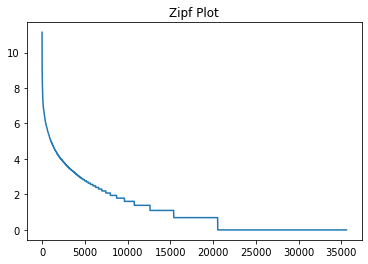

In [13]:
plot_zipf(freqs)

## Exercise 3:

Another way of measuring the richenss of vocabulary is by looking at the type-token distribution of words in a language. Word types are unique words in a corpus, whereas the tokens are the words in a corpus with repetition. And so, a sentence such as "I am taking this class because I love taking on challenges" has 11 tokens, but 9 types since the words "I" and "taking" are repeated twice. Accordingly, Type-to-Token Ratio (TTR) is the ratio of types to tokens, and the higher it is, the less words are repeated, and the richer is the language.

a. In this exercise we will be exploring, for every language, the amount of "types" explored as we explore larger portions of the corpus, or tokens. We will be considering the Universal Declaration of Human Rights in 4 languages. Particularly, we will be plotting the amount of types explored per language as we explore 100 more tokens. For this exercise, complete the following function "get_TTRs" which takes in as an input a predefined set of languages, and returns as an output the dictionary TTR, which has a language as the key, and the value as a list showing the count of types as we explore 100 tokens, 200 tokens, 300 tokens, up until 1300 tokens of the respective corpus. Accordingly, each list in the dictionary should be made of 13 data points. Do not forget to lowercase, but you do not need to perform tokenization as the corpora now are actually a list of words instead of one string. 

In [14]:
from nltk.corpus import udhr
languages = ['Italian-Latin1', 'English-Latin1', 'German_Deutsch-Latin1', 'Finnish_Suomi-Latin1']

def get_TTRs(languages):
    TTRs = {}
    Ratios=[]
    for lang in languages:
        words = udhr.words(lang)
        words=list(words)
        ## your code goes in here
        for i in range(len(words)):
            words[i]=words[i].lower()
            for j in digits:
                words[i]=words[i].replace(j,"")
            for j in puncts:
                words[i]=words[i].replace(j,"")
        toksize=[100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
        
        x=[]
        
        for t in toksize:
            
            tokens=random.sample(words,t)
    
            un=set(tokens)
            typ=len(list(un))
            x.append(typ)
        Ratios.append(x)
        TTRs={k: v for k, v in zip(languages, Ratios)}
    return TTRs

In [15]:
import random
nltk.download('udhr')

[nltk_data] Downloading package udhr to /Users/ab/nltk_data...
[nltk_data]   Package udhr is already up-to-date!


True

In [16]:
get_TTRs(languages)

{'Italian-Latin1': [59,
  122,
  161,
  196,
  236,
  266,
  291,
  304,
  345,
  364,
  395,
  426,
  438],
 'English-Latin1': [63,
  99,
  142,
  190,
  204,
  244,
  252,
  285,
  312,
  328,
  364,
  376,
  391],
 'German_Deutsch-Latin1': [62,
  109,
  154,
  205,
  241,
  293,
  303,
  349,
  377,
  395,
  422,
  453,
  484],
 'Finnish_Suomi-Latin1': [73,
  134,
  168,
  238,
  300,
  328,
  385,
  443,
  482,
  524,
  570,
  604,
  646]}

b. Next, plot a line graph (one line for every language) that shows the count of types discovered on the y-axis and the amount of tokens in the corpus discovered on the x-axis, in increments of 100 tokens, up to 1300.

In [17]:
def plot_TTRs(TTRs):
    ## your code goes in here
    toksize=[100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
    fig,ax = plt.subplots()
    for i in TTRs:
        ax.plot(toksize,TTRs[i],label=i)
    ax.legend()
        
    

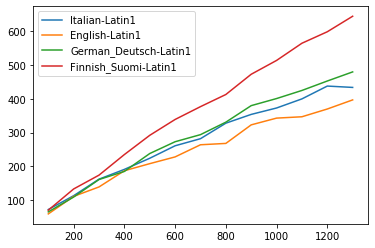

In [18]:
TTRs=get_TTRs(languages)
plot_TTRs(TTRs)

c. Which language has the highest number of types? What could be driving the TTR? Share your thoughts in the textbox below:

## Share your thoughts here

### Finnish is the language that consistently has a higher number of types than other languages for a number of tokens chosen. The TTR could be driven by factors in the language such as -

### 1) the number of unique words (for example if 'freedom of speech' had a unique word such as 'gdgdhj' that means the same thing we reduce the repition of words such as 'of' and 'freedom')

### 2) The number of conjugations for words in different languages based on the tense, and situation of use would increase the number of types. (for example, 'played' can be used to say 'the game will be played' and ' the game was played' if a language has different conjugations for representing a 'play' in past and future it has more types. also, in hindi the word 'you' is used as 'tum' while referring to one informally and is used as 'aap' formally; thus giving rise to more types of the same word.)